In [1]:
from sde import * 

# for next time:
# multiple for each size - 20+
# consistent scale

1. generate random graph with a disproportianate edge-to-node ratio
2. generate x number of those graphs, get average similarity values for each of those
3. repeat for however many number of degrees we want to compare

DO SAME WITH IN/OUT DEGREE

In [13]:
dg = makeDirectedGraph(50,1000)
deg_list = [dg.degree[n] for n in list(dg.nodes())]
print(deg_list)

[19, 20, 15, 17, 17, 15, 20, 18, 17, 16, 24, 15, 19, 17, 18, 18, 16, 16, 22, 20, 18, 14, 18, 16, 17, 18, 25, 19, 17, 13, 13, 16, 14, 20, 15, 20, 17, 16, 22, 22, 20, 18, 21, 21, 20, 17, 20, 16, 19, 17]


In [14]:
len(list(dg.edges()))

449

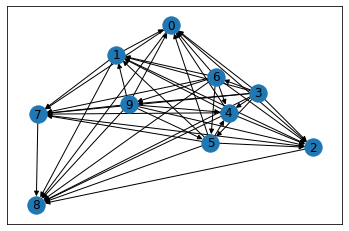

In [10]:
nx.draw_networkx(dg)

# Test Input vs Output # of edges in makeDirectedGraph graphs

In [62]:
edge_node_ratio = np.arange(1, 20.5, .5).tolist()
num_nodes = [25, 50, 75, 100]

is_edges_dict = {}
num_edges_dict = {}
edge_difference_dict = {}
nodes_v_edges = {}

for n in num_nodes:
    num_edges = int(n*r)
    for r in edge_node_ratio:
        actual_edges = []
        differences = []
        for i in range(5):
            dg = makeDirectedGraph(n, num_edges)

            edges = len(list(dg.edges()))
            actual_edges.append(edges)
            
            difference = num_edges - edges
            differences.append(difference)

        #is_edges_dict[r] = (num_edges == actual_edges)
        num_edges_dict[num_edges] = mean(actual_edges)
        edge_difference_dict[r] = difference
        nodes_v_edges[n] = mean(actual_edges)
    
#print(is_edges_dict)
#print(num_edges_dict)
print(edge_difference_dict)

{1.0: 978, 1.5: 997, 2.0: 960, 2.5: 971, 3.0: 999, 3.5: 941, 4.0: 997, 4.5: 939, 5.0: 957, 5.5: 970, 6.0: 1010, 6.5: 953, 7.0: 974, 7.5: 949, 8.0: 995, 8.5: 968, 9.0: 1009, 9.5: 997, 10.0: 955, 10.5: 997, 11.0: 925, 11.5: 961, 12.0: 969, 12.5: 1004, 13.0: 967, 13.5: 1000, 14.0: 986, 14.5: 961, 15.0: 964, 15.5: 927, 16.0: 972, 16.5: 982, 17.0: 954, 17.5: 969, 18.0: 944, 18.5: 991, 19.0: 952, 19.5: 971, 20.0: 989}


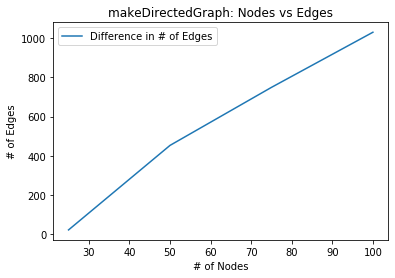

In [65]:
plt.plot(list(nodes_v_edges.keys()), list(nodes_v_edges.values()), label = 'Difference in # of Edges')

plt.xlabel('# of Nodes')
plt.ylabel('# of Edges')
plt.title('makeDirectedGraph: Nodes vs Edges')
plt.legend()

plt.show()

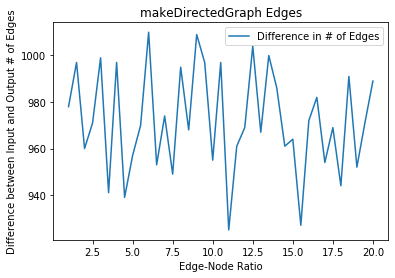

In [66]:
plt.plot(list(edge_difference_dict.keys()), list(edge_difference_dict.values()), label = 'Difference in # of Edges')

plt.xlabel('Edge-Node Ratio')
plt.ylabel('Difference between Input and Output # of Edges')
plt.title('makeDirectedGraph Edges')
plt.legend()

plt.show()

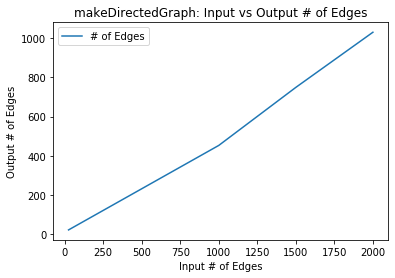

In [67]:
plt.plot(list(num_edges_dict.keys()), list(num_edges_dict.values()), label = '# of Edges')

plt.xlabel('Input # of Edges')
plt.ylabel('Output # of Edges')
plt.title('makeDirectedGraph: Input vs Output # of Edges')
plt.legend()

plt.show()

# Test Networkx gn_graph generated DAG

In [55]:
num_nodes = [25, 50, 75, 100]

ratio_dict = {}
edge_dict = {}

for n in num_nodes:
    ratios = []
    edges = []
    for i in range(10):
        dg = nx.gn_graph(n)
        num_edges = len(list(dg.edges()))

        ratio = num_edges/n

        ratios.append(ratio)
        edges.append(num_edges)
    
    ratio_dict[n] = mean(ratios)
    edge_dict[n] = mean(edges)
    
print(ratio_dict)
print(edge_dict)

"""print(ratios)
print(edges)"""

{25: 0.9600000000000002, 50: 0.9800000000000001, 75: 0.9866666666666667, 100: 0.99}
{25: 24.0, 50: 49.0, 75: 74.0, 100: 99.0}


'print(ratios)\nprint(edges)'

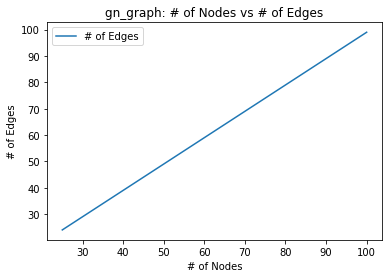

In [56]:
plt.plot(list(edge_dict.keys()), list(edge_dict.values()), label='# of Edges')

plt.xlabel('# of Nodes')
plt.ylabel('# of Edges')
plt.title('gn_graph: # of Nodes vs # of Edges')
plt.legend()

plt.show()

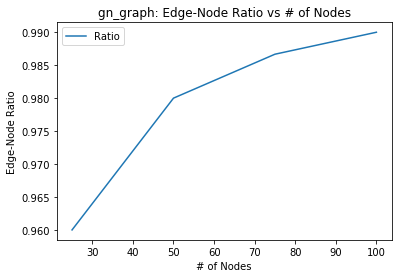

In [57]:
plt.plot(list(ratio_dict.keys()), list(ratio_dict.values()), label='Ratio')

plt.ylabel('Edge-Node Ratio')
plt.xlabel('# of Nodes')
plt.title('gn_graph: Edge-Node Ratio vs # of Nodes')
plt.legend()

plt.show()